In [5]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from my_img_processor import My_Image
import matplotlib as mpl
import cv2
import math


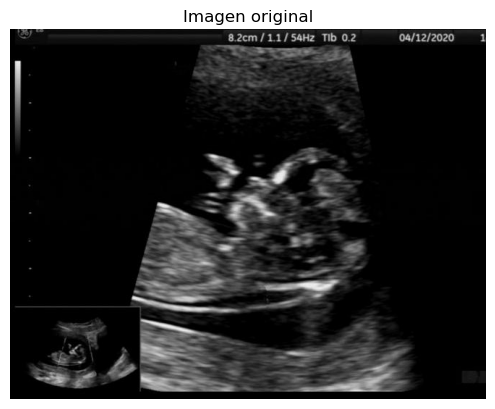

In [6]:
img_path = r'Dataset for Fetus Framework\Dataset for Fetus Framework\External Test Set\Standard\1383.png'
raw_img = My_Image(img_path)

fig_raw, ax_raw = plt.subplots()
ax_raw.imshow(raw_img, vmin=0, vmax=255, cmap='gray')
ax_raw.set_title('Imagen original')
plt.axis('off')
plt.show()

In [7]:
def binarizar_otsu(imagen):
    if len(imagen.shape) == 3:
        imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    else:
        imagen_gris = imagen
    _, imagen_binaria = cv2.threshold(imagen_gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return imagen_binaria

def region_growing(img, seed, thresh=10, max_dist=None):
    """
    Realiza el algoritmo de crecimiento de regiones limitado a una distancia máxima desde la semilla.
    """
    #Inicializar la imagen de salida y una lista de píxeles por procesar
    height, width = img.shape
    segmented_img = np.zeros((height, width), np.uint8)
    segmented_img[seed[1], seed[0]] = 255
    pixel_list = [seed]

    #Definir los movimientos posibles 
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while pixel_list:
        x, y = pixel_list.pop(0)
        for dx, dy in moves:
            nx, ny = x + dx, y + dy
            if 0 <= nx < width and 0 <= ny < height:
                if segmented_img[ny, nx] == 0 and abs(int(img[ny, nx]) - int(img[y, x])) <= thresh:
                    dist = np.sqrt((nx - seed[0])**2 + (ny - seed[1])**2)
                    if max_dist is None or dist <= max_dist:
                        segmented_img[ny, nx] = 255
                        pixel_list.append((nx, ny))

    return segmented_img

#Calcular la distancia
def calcular_distancia(punto1, punto2):
    return np.sqrt((punto1[0] - punto2[0])**2 + (punto1[1] - punto2[1])**2)


img = cv2.imread(img_path)
imagen_binaria = binarizar_otsu(img)

#Definir la semilla para el crecimiento 
seed_point = (345, 369)  

#Definir el segundo punto para calcular la distancia máxima
second_point = (240, 378)  

max_distance = calcular_distancia(seed_point, second_point)
segmented_image = region_growing(imagen_binaria, seed_point, thresh=10, max_dist=max_distance)
cv2.imwrite('imagen_rg.png', segmented_image)
cv2.imshow('Imagen RG', segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
